# Easy
Скачать данные отсюда (кнопка download all снизу):

https://www.kaggle.com/c/titanic/data

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

In [1]:
import pandas as pd
import numpy as np

##### дети

In [91]:
df = pd.read_csv(r'C:\Users\Owner\notebooks\homeworks\data\train.csv')
df = df[['PassengerId', 'Name', 'Age']]
all = df[df['Age'] > 0].count()
deti = df[df['Age'] < 18].count()
percent = deti * 100 / all
percent

PassengerId    15.826331
Name           15.826331
Age            15.826331
dtype: float64

##### соотношение мужчин/женщин

In [99]:
df = pd.read_csv(r'C:\Users\Owner\notebooks\homeworks\data\train.csv')

In [107]:
df = df[['PassengerId', 'Sex']]
df.head()

,PassengerId,Sex
0,1,male
1,2,female
2,3,female
3,4,female
4,5,male


In [103]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [109]:
round(577 / 314)

2

# Normal
Посчитать по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили.

Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [134]:
df = pd.read_csv(r'C:\Users\Owner\notebooks\homeworks\data\train.csv')
df = df[['Age', 'Sex']]
df.isnull().sum()

Age    177
Sex      0
dtype: int64

In [136]:
df.dropna(axis=0, how='any')

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
885,39.0,female
886,27.0,male
887,19.0,female
889,26.0,male


<AxesSubplot: xlabel='Age', ylabel='Count'>

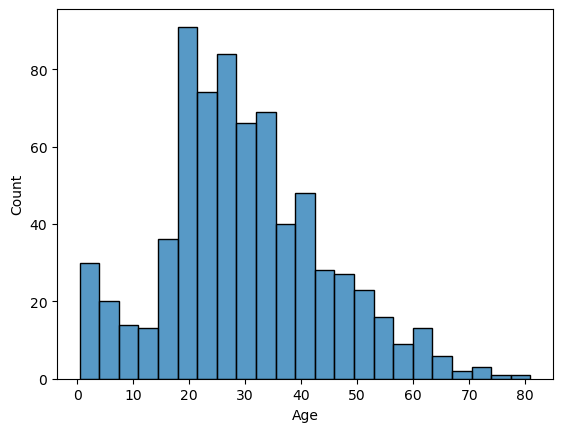

In [149]:
import seaborn as sns
sns.histplot(df["Age"], binwidth=3.5)

In [267]:
df = pd.read_csv(r'C:\Users\Owner\notebooks\homeworks\data\train.csv')
df = df[['Survived', 'Sex', 'Age']]
df = df.dropna()
df = df[df['Survived'] == 1]
df['Children'] = df['Age'] < 18 
df = df.reset_index()
df

,index,Survived,Sex,Age,Children
0,1,1,female,38.0,False
1,2,1,female,26.0,False
2,3,1,female,35.0,False
3,8,1,female,27.0,False
4,9,1,female,14.0,True
...,...,...,...,...,...
285,875,1,female,15.0,True
286,879,1,female,56.0,False
287,880,1,female,25.0,False
288,887,1,female,19.0,False


In [268]:
df = df.groupby(["Sex", "Children"]).agg({'Survived':['sum']}) 
df['Percent'] = round(df['Survived'] * 100 / 290)
df

Survived Percent
                     sum        
Sex    Children                 
female False         159    55.0
       True           38    13.0
male   False          70    24.0
       True           23     8.0

In [392]:
df = pd.read_csv(r'C:\Users\Owner\notebooks\homeworks\data\train.csv')
df = df[['Survived', 'Sex', 'Age']]
df = df.dropna()
df = df.reset_index()
df

,index,Survived,Sex,Age
0,0,0,male,22.0
1,1,1,female,38.0
2,2,1,female,26.0
3,3,1,female,35.0
4,4,0,male,35.0
...,...,...,...,...
709,885,0,female,39.0
710,886,0,male,27.0
711,887,1,female,19.0
712,889,1,male,26.0


In [397]:
df_needed_format = pd.pivot_table(df, columns='Sex', values='Survived', index='index')
df_needed_format # почему NaN'ы вылезают?????? 

Sex,female,male
index,,
0,NaN,0.0
1,1.0,NaN
2,1.0,NaN
3,1.0,NaN
4,NaN,0.0
...,...,...
885,0.0,NaN
886,NaN,0.0
887,1.0,NaN


In [318]:
df = pd.read_csv(r'C:\Users\Owner\notebooks\homeworks\data\train.csv')
df = df[['Survived', 'Sex', 'Age']]
df = df.dropna().reset_index()
df ['AgeGroup'] = pd.cut (df['Age'], 5) # Разделите значение столбца age на пять равных частей
df.AgeGroup.value_counts(sort=False)

(0.34, 16.336]      100
(16.336, 32.252]    346
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeGroup, dtype: int64

In [320]:
df.pivot_table(values='Survived',index='AgeGroup',aggfunc=np.mean)

,Survived
AgeGroup,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.369942
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909
